Entire Playlist: https://www.youtube.com/watch?v=zW1SvA0Z-l4&list=PLc2rvfiptPSQYzmDIFuq2PqN2n28ZjxDH&index=11

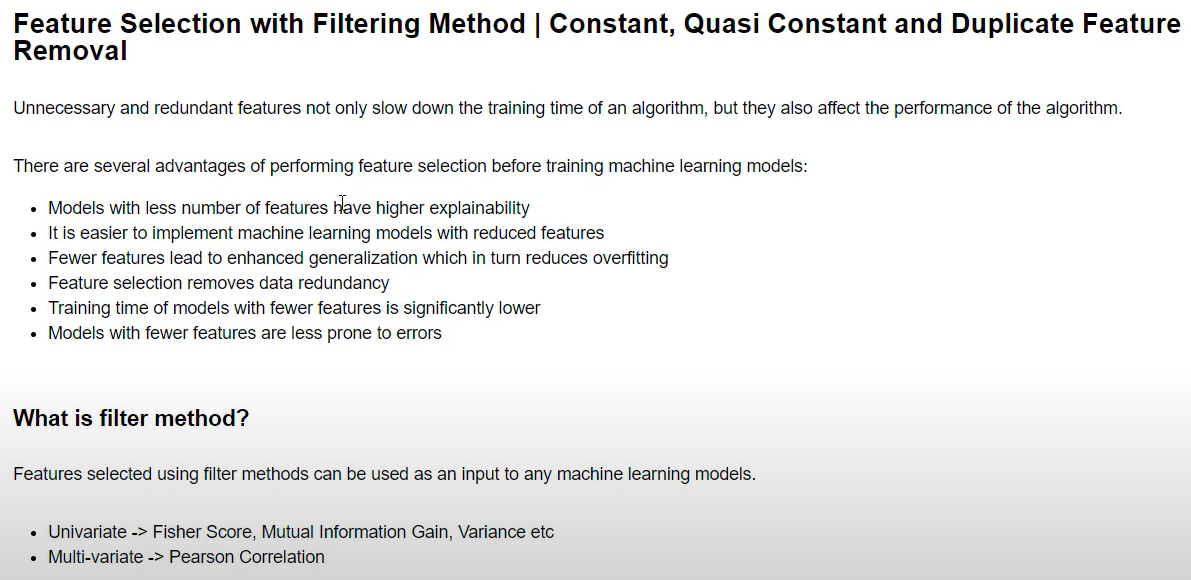

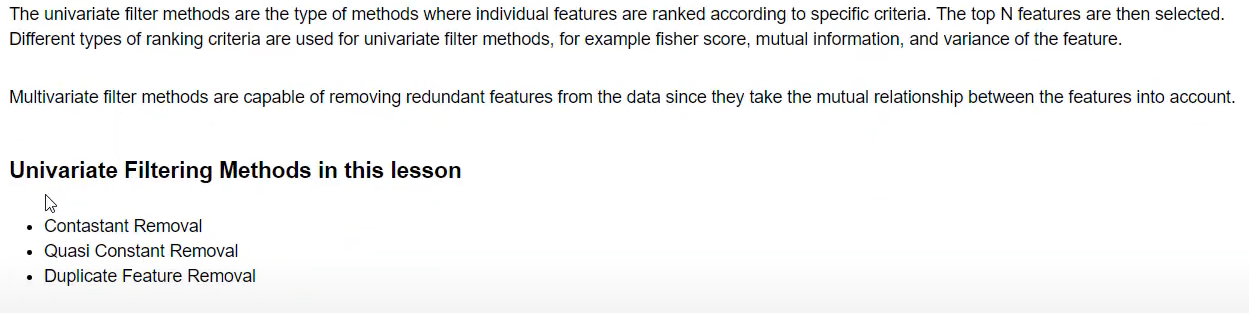

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv(r'santander.csv', nrows=20000)
data.head()

ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                        0                        0  ...   
1                        0                        0  ...   
2                        0                        0  ...   
3                        0                        0  ...   
4                        0                        0  ...   

   saldo_medio_var33_hace2  saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
0                      0.0                      0.0                     0.0   
1                      0.0                      0.0                     0.0   
2                      0.0                      0.0                     0.0   
3                      0.0                      0.0                     0.0   
4                      0.0                      0.0                     0.0   

   saldo_medio_var33_ult3  saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
0                     0.0                      0.0                      0.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      0.0   
3                     0.0                      0.0                      0.0   
4                     0.0                      0.0                      0.0   

   saldo_medio_var44_ult1  saldo_medio_var44_ult3          var38  TARGET  
0                     0.0                     0.0   39205.170000       0  
1                     0.0                     0.0   49278.030000       0  
2                     0.0                     0.0   67333.770000       0  
3                     0.0                     0.0   64007.970000       0  
4                     0.0                     0.0  117310.979016       0  

[5 rows x 371 columns]

#### as we are using RandomForest we donot need to standardize our dataset

In [4]:
data.shape

(20000, 371)

In [5]:
data.isnull().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [6]:
X = data.drop('TARGET', axis =1)
y = data['TARGET']

X.shape, y.shape

((20000, 370), (20000,))

##### to avoid overfitting we will apply feature selection on X_train first, then on X_test seperately

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0, stratify=y)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((16000, 370), (4000, 370), (16000,), (4000,))

### Constant feature Removal

In [8]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [9]:
constant_filter.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [18]:
constant_filter.get_support().sum()

291

In [15]:
constant_filter.get_feature_names_out()

array(['ID', 'var3', 'var15', 'imp_ent_var16_ult1',
       'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3',
       'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3',
       'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3',
       'imp_op_var40_ult1', 'imp_op_var41_comer_ult1',
       'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1',
       'imp_op_var41_efect_ult3', 'imp_op_var41_ult1',
       'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3',
       'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'ind_var1_0',
       'ind_var1', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6',
       'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12',
       'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto',
       'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13', 'ind_var14_0',
       'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var19',
       'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24',
       'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26',
       

In [12]:
len(constant_filter.get_feature_names_out())

291

In [19]:
# getting the constant list that was dropped

constant_list = [not constant for constant in constant_filter.get_support()]
constant_list

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fa

In [20]:
X.columns[constant_list]

# 79 constant features

Index(['ind_var2_0', 'ind_var2', 'ind_var13_medio_0', 'ind_var13_medio',
       'ind_var18_0', 'ind_var18', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var34_0', 'ind_var34', 'ind_var41', 'ind_var46_0',
       'ind_var46', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0',
       'num_var18', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27',
       'num_var34_0', 'num_var34', 'num_var41', 'num_var46_0', 'num_var46',
       'saldo_var13_medio', 'saldo_var18', 'saldo_var28', 'saldo_var27',
       'saldo_var34', 'saldo_var41', 'saldo_var46',
       'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3',
       'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3',
       'delta_imp_trasp_var33_out_1y3', 'delta_num_reemb_var33_1y3',
       'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_out_1y3',
       'imp_amort_var18_hace3', 'imp_amort_var18_ult1',
       'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_var7_emit_ult1',
       'imp

In [21]:
len(X.columns[constant_list])

79

In [13]:
# way of avoiding overfitting
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [14]:
X_train_filter.shape, X_test_filter.shape

((16000, 291), (4000, 291))

### Quasi Constant feature removal

These are the feature which have same values for very large subsets of the output. Not useful for predictions 

In [15]:
quasi_constant_filter = VarianceThreshold(threshold=0.01) ## features with 99% similar values

In [16]:
quasi_constant_filter.fit(X_train_filter)

VarianceThreshold(threshold=0.01)

In [17]:
quasi_constant_filter.get_support().sum()

245

we are left with 245 columns from 291

In [18]:
## removing the quasi constant features

X_train_quasi_filter = quasi_constant_filter.transform(X_train_filter)
X_test_quasi_filter = quasi_constant_filter.transform(X_test_filter)


In [19]:
X_train_quasi_filter.shape, X_test_quasi_filter.shape

((16000, 245), (4000, 245))

### Remove Duplicate Features

these have exactly similar values.

here we will transpose the rows into the columns as sklearn doesnot have a library for it.

In [20]:
X_train_quasi_filter.shape

(16000, 245)

In [21]:
X_train_T = X_train_quasi_filter.T
X_test_T = X_test_quasi_filter.T

In [22]:
X_train_T.shape

(245, 16000)

In [23]:
type(X_train_T)

numpy.ndarray

converting this numpy array into dataframe

In [24]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [25]:
X_train_T

0         1         2          3              4         5      \
0    17282.0  38270.00  31526.00   38737.00   16469.000000   4464.00   
1        2.0      2.00      2.00       2.00       2.000000      2.00   
2       24.0     23.00     45.00      29.00      23.000000     23.00   
3        0.0      0.00      0.00       0.00       0.000000      0.00   
4        0.0      0.00      0.00       0.00       0.000000      0.00   
..       ...       ...       ...        ...            ...       ...   
240      0.0      0.00      0.00       0.00       0.000000      0.00   
241      0.0      0.00      0.00       0.00       0.000000      0.00   
242      0.0      0.00      0.00       0.00       0.000000      0.00   
243      0.0      0.00      0.00       0.00       0.000000      0.00   
244  63200.7  88640.61  96314.16  117568.02  117310.979016  81443.55   

             6          7         8         9      ...          15990  \
0       302.000000   22890.00  12211.00  11949.00  ...   31516.000000   
1         2.000000       2.00      2.00      2.00  ...       2.000000   
2        31.000000      31.00     24.00     28.00  ...      26.000000   
3         0.000000       0.00      0.00      0.00  ...       0.000000   
4        97.590000    1005.54      0.00      0.00  ...       0.000000   
..             ...        ...       ...       ...  ...            ...   
240       0.000000       0.00      0.00      0.00  ...       0.000000   
241       0.000000       0.00      0.00      0.00  ...       0.000000   
242       0.000000       0.00      0.00      0.00  ...       0.000000   
243       0.000000       0.00      0.00      0.00  ...       0.000000   
244  117310.979016  277918.20  63651.06  69962.31  ...  117310.979016   

        15991      15992          15993      15994     15995     15996  \
0     1337.00   37006.00   19809.000000   10783.00  38333.00  26389.00   
1        2.00       2.00       2.000000       2.00      2.00      2.00   
2       36.00      23.00      44.000000      23.00     25.00     34.00   
3        0.00       0.00       0.000000       0.00      0.00      0.00   
4        0.00       0.00       0.000000      53.85      0.00      0.00   
..        ...        ...            ...        ...       ...       ...   
240      0.00       0.00       0.000000       0.00      0.00      0.00   
241      0.00       0.00       0.000000       0.00      0.00      0.00   
242      0.00       0.00       0.000000       0.00      0.00      0.00   
243      0.00       0.00       0.000000       0.00      0.00      0.00   
244  95510.49  158005.98  117310.979016  161478.51  53324.46  56028.48   

        15997          15998      15999  
0     2025.00   17327.000000   25406.00  
1        2.00       2.000000       2.00  
2       43.00      23.000000      23.00  
3        0.00       0.000000       0.00  
4        0.00       0.000000       0.00  
..        ...            ...        ...  
240      0.00       0.000000       0.00  
241      0.00       0.000000       0.00  
242      0.00       0.000000       0.00  
243      0.00       0.000000       0.00  
244  38272.44  117310.979016  304163.07  

[245 rows x 16000 columns]

In [26]:
X_train_T.shape, X_test_T.shape

((245, 16000), (245, 4000))

In [27]:
X_train_T.duplicated().sum()

# there are 18 duplicate columns i.e 18 duplicate rows

18

In [28]:
duplicated_features = X_train_T.duplicated()
duplicated_features

# True means features are duplicate

0      False
1      False
2      False
3      False
4      False
       ...  
240    False
241    False
242    False
243    False
244    False
Length: 245, dtype: bool

In [29]:
features_to_keep = [not index for index in duplicated_features] # keeping the False i.e not duplicate rows

In [30]:
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [31]:
X_train_unique.shape, X_test_unique.shape

((16000, 227), (4000, 227))

now we are left with 227 columns

### Build the model and compare theperfromance of the selected features

In [32]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy of the dataset: ", accuracy_score(y_test, y_pred))

In [33]:
import time

In [34]:
%%time
run_randomForest(X_train_unique, X_test_unique, y_train, y_test)

Accuracy of the dataset:  0.95875
Wall time: 1.79 s


In [35]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy of the dataset:  0.9585
Wall time: 2.35 s


___
___

# Feature Selection with autocorrelation (Pearson-Correlation)

https://www.youtube.com/watch?v=m0fs0v5GGlg&list=PLc2rvfiptPSQYzmDIFuq2PqN2n28ZjxDH&index=6

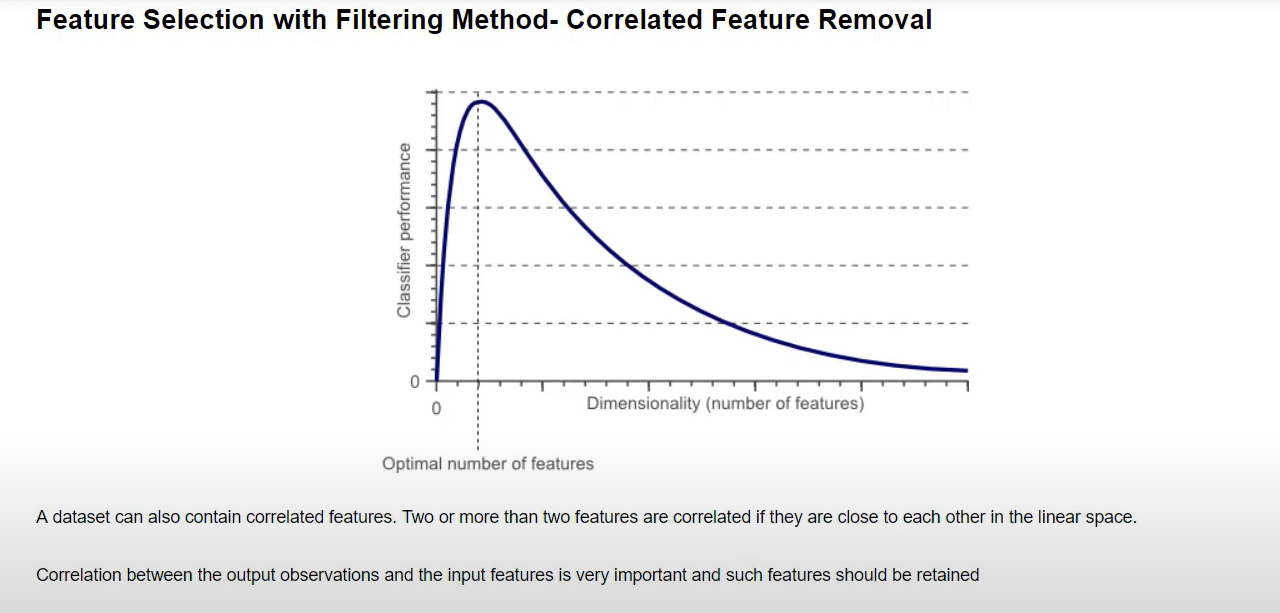

__The covariance of two variables divided by the product of their standard deviations gives Pearson’s correlation coefficient. It is usually represented by ρ (rho).__

__Pearson correlation is kind of Co-variance__

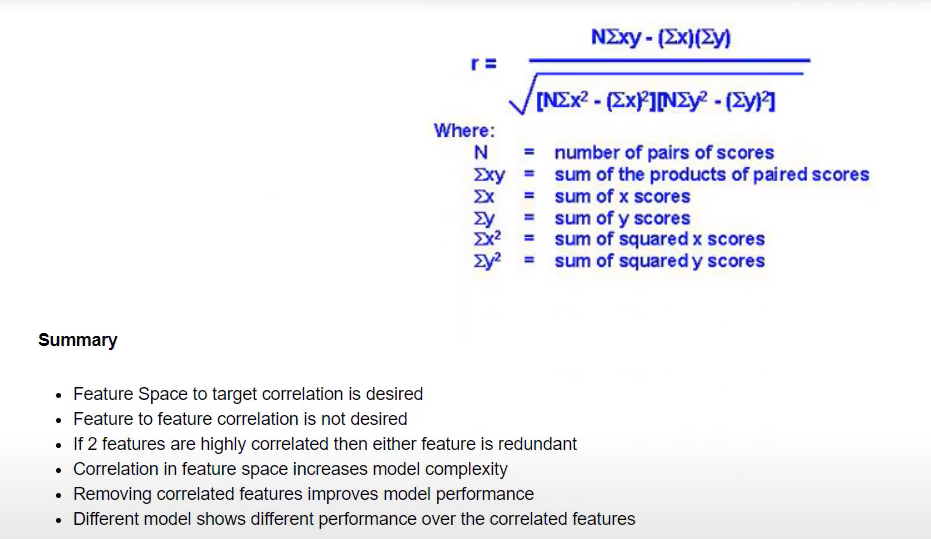

In [36]:
corrmat = X_train_unique.corr()

In [37]:
corrmat

0         1         2         3         4         5         6    \
0    1.000000 -0.025277 -0.001942  0.003594  0.004054 -0.001697 -0.015882   
1   -0.025277  1.000000 -0.007647  0.001819  0.008981  0.009232  0.001638   
2   -0.001942 -0.007647  1.000000  0.030919  0.106245  0.109140  0.048524   
3    0.003594  0.001819  0.030919  1.000000  0.029418  0.024905  0.014513   
4    0.004054  0.008981  0.106245  0.029418  1.000000  0.888789  0.381632   
..        ...       ...       ...       ...       ...       ...       ...   
240  0.008825  0.000922  0.041321  0.000541 -0.001905  0.000871 -0.000818   
241 -0.009174  0.000598  0.016172 -0.000577 -0.000635  0.007096 -0.000515   
242  0.012031  0.000875  0.043577  0.000231 -0.002552 -0.001672 -0.000779   
243  0.012128  0.000942  0.044281  0.000235 -0.002736 -0.001844 -0.000839   
244  0.006612  0.000415 -0.000810  0.000966  0.003656  0.002257  0.004448   

          7         8         9    ...       235       236       237  \
0   -0.019807  0.000956 -0.000588  ... -0.001337  0.002051 -0.008500   
1    0.001746  0.000614  0.000695  ...  0.000544  0.000586  0.000337   
2    0.055708  0.004040  0.005796  ...  0.025522  0.020168  0.011550   
3    0.013857 -0.000613 -0.000691  ...  0.014032 -0.000583 -0.000337   
4    0.341266  0.012927  0.019674  ...  0.002328  0.016743 -0.001662   
..        ...       ...       ...  ...       ...       ...       ...   
240 -0.000866 -0.000309 -0.000349  ...  0.012705  0.021540 -0.000170   
241 -0.000545 -0.000195 -0.000220  ... -0.000173 -0.000185 -0.000107   
242 -0.000825 -0.000295 -0.000332  ...  0.027515  0.012393 -0.000162   
243 -0.000888 -0.000317 -0.000358  ...  0.023072  0.014523 -0.000174   
244  0.002427 -0.000739 -0.000811  ... -0.003399 -0.000773 -0.000402   

          238       239       240       241       242       243       244  
0    0.006554  0.005907  0.008825 -0.009174  0.012031  0.012128  0.006612  
1    0.000550  0.000563  0.000922  0.000598  0.000875  0.000942  0.000415  
2    0.019325  0.019527  0.041321  0.016172  0.043577  0.044281 -0.000810  
3   -0.000548 -0.000561  0.000541 -0.000577  0.000231  0.000235  0.000966  
4    0.020509  0.021276 -0.001905 -0.000635 -0.002552 -0.002736  0.003656  
..        ...       ...       ...       ...       ...       ...       ...  
240  0.032162  0.030087  1.000000  0.329805  0.935317  0.919036  0.011106  
241 -0.000174 -0.000178  0.329805  1.000000  0.127224  0.140902  0.011807  
242  0.018565  0.017358  0.935317  0.127224  1.000000  0.993536  0.008604  
243  0.021742  0.020331  0.919036  0.140902  0.993536  1.000000  0.009136  
244 -0.000525 -0.000589  0.011106  0.011807  0.008604  0.009136  1.000000  

[227 rows x 227 columns]

<AxesSubplot:>

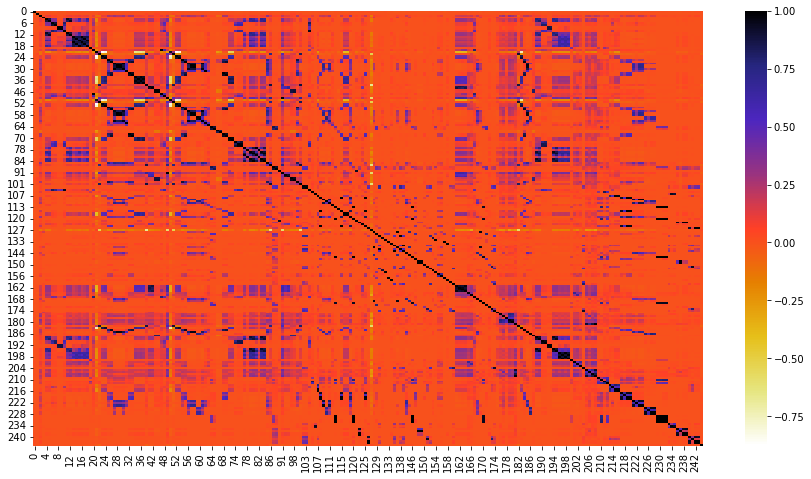

In [38]:
plt.figure(figsize = (15,8))
sns.heatmap(corrmat,cmap=plt.cm.CMRmap_r)

In [39]:
# taking both positively and negatively correlated columns using abs of correlation

def get_correlation(training_data, threshold):
    corr_col = set()
    corrmat = training_data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j]) > threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
                
    return corr_col        

In [40]:
corr_features = get_correlation(X_train_unique, 0.85)
len(corr_features)

# 124 columns are highly correlated

124

In [41]:
X_train_uncorr = X_train_unique.drop(labels=corr_features, axis =1)
X_test_uncorr = X_test_unique.drop(labels=corr_features, axis =1)

In [42]:
X_train_uncorr.shape, X_test_uncorr.shape

((16000, 103), (4000, 103))

we are left with 103 columns

In [43]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy of the dataset: ", accuracy_score(y_test, y_pred))

In [44]:
%%time
run_randomForest(X_train_uncorr, X_test_uncorr, y_train, y_test)

Accuracy of the dataset:  0.95875
Wall time: 1.32 s


#### above one was brute force method with dropping both correlated columns, which is not recommended

### doing feature importance and grouping of the correlated features

In [45]:
corrmat

0         1         2         3         4         5         6    \
0    1.000000 -0.025277 -0.001942  0.003594  0.004054 -0.001697 -0.015882   
1   -0.025277  1.000000 -0.007647  0.001819  0.008981  0.009232  0.001638   
2   -0.001942 -0.007647  1.000000  0.030919  0.106245  0.109140  0.048524   
3    0.003594  0.001819  0.030919  1.000000  0.029418  0.024905  0.014513   
4    0.004054  0.008981  0.106245  0.029418  1.000000  0.888789  0.381632   
..        ...       ...       ...       ...       ...       ...       ...   
240  0.008825  0.000922  0.041321  0.000541 -0.001905  0.000871 -0.000818   
241 -0.009174  0.000598  0.016172 -0.000577 -0.000635  0.007096 -0.000515   
242  0.012031  0.000875  0.043577  0.000231 -0.002552 -0.001672 -0.000779   
243  0.012128  0.000942  0.044281  0.000235 -0.002736 -0.001844 -0.000839   
244  0.006612  0.000415 -0.000810  0.000966  0.003656  0.002257  0.004448   

          7         8         9    ...       235       236       237  \
0   -0.019807  0.000956 -0.000588  ... -0.001337  0.002051 -0.008500   
1    0.001746  0.000614  0.000695  ...  0.000544  0.000586  0.000337   
2    0.055708  0.004040  0.005796  ...  0.025522  0.020168  0.011550   
3    0.013857 -0.000613 -0.000691  ...  0.014032 -0.000583 -0.000337   
4    0.341266  0.012927  0.019674  ...  0.002328  0.016743 -0.001662   
..        ...       ...       ...  ...       ...       ...       ...   
240 -0.000866 -0.000309 -0.000349  ...  0.012705  0.021540 -0.000170   
241 -0.000545 -0.000195 -0.000220  ... -0.000173 -0.000185 -0.000107   
242 -0.000825 -0.000295 -0.000332  ...  0.027515  0.012393 -0.000162   
243 -0.000888 -0.000317 -0.000358  ...  0.023072  0.014523 -0.000174   
244  0.002427 -0.000739 -0.000811  ... -0.003399 -0.000773 -0.000402   

          238       239       240       241       242       243       244  
0    0.006554  0.005907  0.008825 -0.009174  0.012031  0.012128  0.006612  
1    0.000550  0.000563  0.000922  0.000598  0.000875  0.000942  0.000415  
2    0.019325  0.019527  0.041321  0.016172  0.043577  0.044281 -0.000810  
3   -0.000548 -0.000561  0.000541 -0.000577  0.000231  0.000235  0.000966  
4    0.020509  0.021276 -0.001905 -0.000635 -0.002552 -0.002736  0.003656  
..        ...       ...       ...       ...       ...       ...       ...  
240  0.032162  0.030087  1.000000  0.329805  0.935317  0.919036  0.011106  
241 -0.000174 -0.000178  0.329805  1.000000  0.127224  0.140902  0.011807  
242  0.018565  0.017358  0.935317  0.127224  1.000000  0.993536  0.008604  
243  0.021742  0.020331  0.919036  0.140902  0.993536  1.000000  0.009136  
244 -0.000525 -0.000589  0.011106  0.011807  0.008604  0.009136  1.000000  

[227 rows x 227 columns]

In [46]:
corrdata = corrmat.abs().stack()

# stacking of features

In [47]:
corrdata

0    0      1.000000
     1      0.025277
     2      0.001942
     3      0.003594
     4      0.004054
              ...   
244  240    0.011106
     241    0.011807
     242    0.008604
     243    0.009136
     244    1.000000
Length: 51529, dtype: float64

In [48]:
corrdata = corrdata.sort_values(ascending = False)

In [49]:
corrdata

47   20     1.000000e+00
20   47     1.000000e+00
31   62     1.000000e+00
62   31     1.000000e+00
58   29     1.000000e+00
                ...     
229  111    1.934954e-06
150  231    6.044672e-07
231  150    6.044672e-07
     123    3.966696e-07
123  231    3.966696e-07
Length: 51529, dtype: float64

In [50]:
# columns with greater than 0.85

corrdata = corrdata[corrdata > 0.85]
corrdata = corrdata[corrdata < 1]
corrdata

138  130    1.000000
130  138    1.000000
143  135    1.000000
135  143    1.000000
132  154    1.000000
              ...   
67   66     0.851384
28   61     0.851022
61   28     0.851022
72   35     0.850893
35   72     0.850893
Length: 522, dtype: float64

#### grouping of columns

In [51]:
corrdata = pd.DataFrame(corrdata).reset_index()
corrdata.columns = ['features1','features2','corr_value']
corrdata

features1  features2  corr_value
0          138        130    1.000000
1          130        138    1.000000
2          143        135    1.000000
3          135        143    1.000000
4          132        154    1.000000
..         ...        ...         ...
517         67         66    0.851384
518         28         61    0.851022
519         61         28    0.851022
520         72         35    0.850893
521         35         72    0.850893

[522 rows x 3 columns]

In [52]:
grouped_feature_list = []
correlated_groups_list = []

for feature in corrdata.features1.unique(): 
    if feature not in grouped_feature_list: # checking if the feature from feature1 is present in grouped_feature_list
        correlated_block = corrdata[corrdata.features1 == feature] 
        grouped_feature_list = grouped_feature_list + list(correlated_block.features2.unique()) + [feature]
        # grouping all the feature1 with feature2
        print(grouped_feature_list)
        correlated_groups_list.append(correlated_block)

[130, 138]
[130, 138, 135, 143]
[130, 138, 135, 143, 154, 132]
[130, 138, 135, 143, 154, 132, 133, 157]
[130, 138, 135, 143, 154, 132, 133, 157, 146, 229, 231, 232, 113, 120, 170, 230]
[130, 138, 135, 143, 154, 132, 133, 157, 146, 229, 231, 232, 113, 120, 170, 230, 122, 239, 236, 238]
[130, 138, 135, 143, 154, 132, 133, 157, 146, 229, 231, 232, 113, 120, 170, 230, 122, 239, 236, 238, 148, 149]
[130, 138, 135, 143, 154, 132, 133, 157, 146, 229, 231, 232, 113, 120, 170, 230, 122, 239, 236, 238, 148, 149, 148, 237]
[130, 138, 135, 143, 154, 132, 133, 157, 146, 229, 231, 232, 113, 120, 170, 230, 122, 239, 236, 238, 148, 149, 148, 237, 78, 82]
[130, 138, 135, 143, 154, 132, 133, 157, 146, 229, 231, 232, 113, 120, 170, 230, 122, 239, 236, 238, 148, 149, 148, 237, 78, 82, 115, 219, 125, 220, 217, 108]
[130, 138, 135, 143, 154, 132, 133, 157, 146, 229, 231, 232, 113, 120, 170, 230, 122, 239, 236, 238, 148, 149, 148, 237, 78, 82, 115, 219, 125, 220, 217, 108, 68, 33, 69, 26, 55, 32]
[130, 138, 

In [53]:
len(correlated_groups_list)

59

In [54]:
for group in correlated_groups_list:
    print(group)

   features1  features2  corr_value
0        138        130         1.0
   features1  features2  corr_value
2        143        135         1.0
   features1  features2  corr_value
4        132        154         1.0
   features1  features2  corr_value
6        157        133         1.0
     features1  features2  corr_value
8          230        146    0.999997
27         230        229    0.999769
49         230        231    0.997042
59         230        232    0.996765
66         230        113    0.996422
78         230        120    0.993305
235        230        170    0.943712
     features1  features2  corr_value
10         238        122    0.999945
37         238        239    0.998497
252        238        236    0.938668
    features1  features2  corr_value
12        149        148    0.999929
    features1  features2  corr_value
14        237        148    0.999929
    features1  features2  corr_value
22         82         78    0.999859
     features1  features2  corr_va

### Feature importance based on Tree Based Classifiers

In [55]:
important_features = []
for group in correlated_groups_list:
    features = list(group.features1.unique()) + list(group.features2.unique())
    rf = RandomForestClassifier(n_estimators=100, random_state=0)
    rf.fit(X_train_unique[features], y_train)
    
    
    importance = pd.concat([pd.Series(features), pd.Series(rf.feature_importances_)], axis = 1)
    importance.columns = ['features','importance']
    importance.sort_values(by = 'importance', ascending = False, inplace = True)
    feat = importance.iloc[0]
    important_features.append(feat)

In [56]:
important_features = pd.DataFrame(important_features)

In [57]:
important_features.reset_index(inplace=True, drop=True)


In [58]:
important_features

features  importance
0      138.0    0.504220
1      135.0    0.510000
2      154.0    0.565217
3      157.0    0.523077
4      120.0    0.749683
5      122.0    0.343434
6      148.0    0.721198
7      148.0    0.721198
8       82.0    0.518827
9      125.0    0.940524
10      26.0    0.240750
11     197.0    0.287753
12     207.0    0.312834
13      17.0    0.286833
14     242.0    0.431557
15     185.0    0.391367
16     182.0    0.432045
17      95.0    0.487162
18      80.0    0.315110
19     221.0    0.281581
20       8.0    0.345509
21     227.0    0.434186
22     116.0    0.524380
23      49.0    0.500161
24      54.0    0.396772
25     190.0    0.494814
26      36.0    0.273335
27      15.0    0.400677
28     107.0    0.357340
29      61.0    0.323735
30      41.0    0.379332
31     102.0    0.522452
32     195.0    0.242166
33      60.0    0.500520
34     128.0    0.531052
35     191.0    0.368931
36      83.0    0.213490
37     234.0    0.469178
38     184.0    0.423768
39     104.0    0.640915
40     179.0    0.640784
41     151.0    0.510000
42     161.0    0.346426
43       5.0    0.356386
44       5.0    0.403831
45      93.0    0.544349
46      89.0    0.510000
47     183.0    0.346189
48     183.0    0.346189
49      88.0    0.482695
50     174.0    0.755765
51      50.0    0.616659
52      76.0    0.879050
53       7.0    0.582456
54      64.0    0.572448
55     101.0    0.379546
56     153.0    0.515152
57     151.0    0.510000
58      66.0    0.630293

In [59]:
corr_features

{5,
 7,
 9,
 11,
 12,
 14,
 15,
 16,
 17,
 18,
 23,
 24,
 28,
 29,
 30,
 32,
 33,
 35,
 36,
 38,
 42,
 46,
 47,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 60,
 61,
 62,
 65,
 67,
 68,
 69,
 70,
 72,
 76,
 80,
 81,
 82,
 83,
 84,
 86,
 87,
 88,
 91,
 93,
 95,
 98,
 100,
 101,
 103,
 104,
 111,
 115,
 117,
 120,
 121,
 125,
 136,
 138,
 143,
 146,
 149,
 153,
 154,
 157,
 158,
 161,
 162,
 163,
 164,
 169,
 170,
 173,
 180,
 182,
 183,
 184,
 185,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 197,
 198,
 199,
 204,
 205,
 207,
 208,
 215,
 216,
 217,
 219,
 220,
 221,
 223,
 224,
 227,
 228,
 229,
 230,
 231,
 232,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243}

In [60]:
len(corr_features)

124

In [61]:
features_to_consider = set(important_features['features'])

In [62]:
features_to_discard = set(corr_features) - set(features_to_consider)

In [63]:
features_to_discard = list(features_to_discard)

In [64]:
X_train_grouped_uncorr = X_train_unique.drop(labels = features_to_discard, axis = 1)
X_train_grouped_uncorr.shape

(16000, 141)

In [65]:
X_test_grouped_uncorr = X_test_unique.drop(labels = features_to_discard, axis = 1)
X_test_grouped_uncorr.shape

(4000, 141)

In [66]:
%%time
run_randomForest(X_train_grouped_uncorr, X_test_grouped_uncorr, y_train, y_test)

Accuracy of the dataset:  0.958
Wall time: 1.39 s


In [67]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy of the dataset:  0.9585
Wall time: 2.24 s


In [68]:
%%time
run_randomForest(X_train_uncorr, X_test_uncorr, y_train, y_test)

Accuracy of the dataset:  0.95875
Wall time: 1.48 s


___

# Univariate Feature Selection

## Feature Selection Based on Mutual Information (Entropy) Gain for classification and Regression

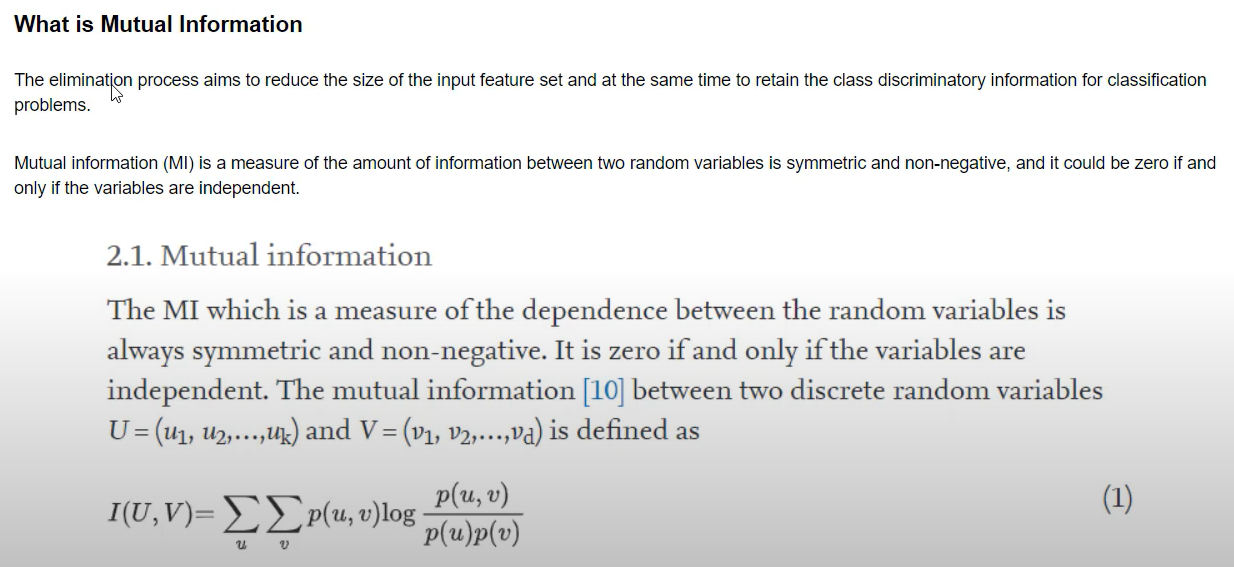

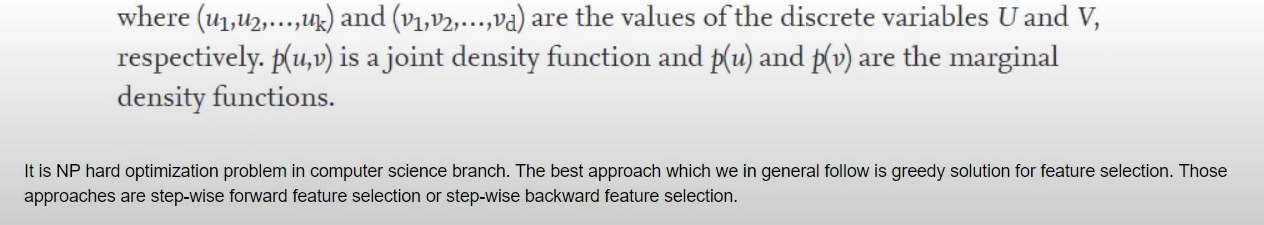

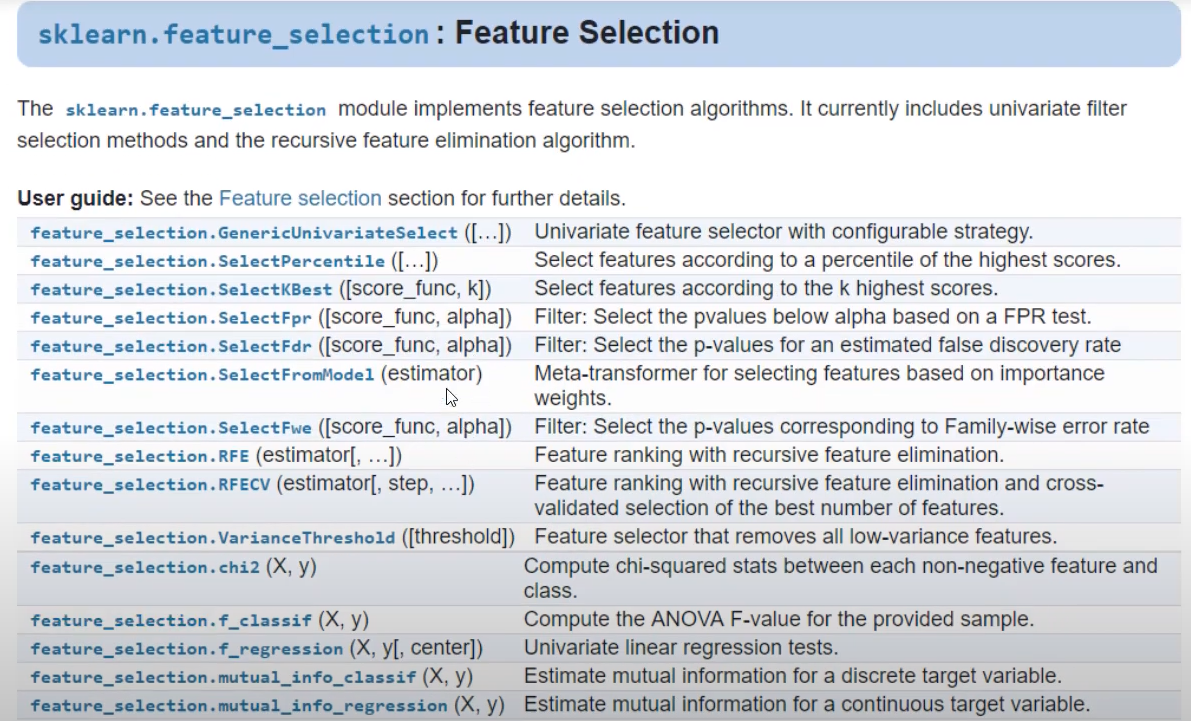

### Classification Problem:

In [69]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif,mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [70]:
data = pd.read_csv('santander.csv', nrows=20000)
data.head()

ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                        0                        0  ...   
1                        0                        0  ...   
2                        0                        0  ...   
3                        0                        0  ...   
4                        0                        0  ...   

   saldo_medio_var33_hace2  saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
0                      0.0                      0.0                     0.0   
1                      0.0                      0.0                     0.0   
2                      0.0                      0.0                     0.0   
3                      0.0                      0.0                     0.0   
4                      0.0                      0.0                     0.0   

   saldo_medio_var33_ult3  saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
0                     0.0                      0.0                      0.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      0.0   
3                     0.0                      0.0                      0.0   
4                     0.0                      0.0                      0.0   

   saldo_medio_var44_ult1  saldo_medio_var44_ult3          var38  TARGET  
0                     0.0                     0.0   39205.170000       0  
1                     0.0                     0.0   49278.030000       0  
2                     0.0                     0.0   67333.770000       0  
3                     0.0                     0.0   64007.970000       0  
4                     0.0                     0.0  117310.979016       0  

[5 rows x 371 columns]

In [71]:
data.shape

(20000, 371)

In [72]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [73]:
X.shape, y.shape

((20000, 370), (20000,))

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16000, 370), (4000, 370), (16000,), (4000,))

#### Remove constant, quazi constantand duplicate features

In [75]:
X_train_grouped_uncorr.shape, X_test_grouped_uncorr.shape

((16000, 141), (4000, 141))

In [76]:
X_train_unique.shape, X_test_unique.shape

((16000, 227), (4000, 227))

In [77]:
mi = mutual_info_classif(X_train_unique, y_train)

In [78]:
len(mi)

227

In [79]:
mi

array([2.68314253e-03, 0.00000000e+00, 1.41461044e-02, 0.00000000e+00,
       2.71639868e-03, 0.00000000e+00, 0.00000000e+00, 2.48592875e-04,
       1.56926373e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.88428342e-04, 0.00000000e+00, 4.95055777e-04,
       7.18784902e-04, 2.28067025e-03, 0.00000000e+00, 2.45352023e-03,
       8.02326075e-04, 1.39832368e-03, 1.02735835e-02, 2.38385930e-04,
       0.00000000e+00, 0.00000000e+00, 9.09357030e-05, 1.93343662e-03,
       0.00000000e+00, 0.00000000e+00, 1.73695907e-03, 8.04522522e-04,
       0.00000000e+00, 4.89898525e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00253367e-03, 1.13086939e-02, 1.14494416e-03,
       2.65598840e-03, 4.72271911e-04, 7.85191992e-04, 0.00000000e+00,
       2.58414928e-03, 1.00490284e-02, 7.83025728e-04, 8.78993190e-03,
       1.71591876e-03, 0.00000000e+00, 0.00000000e+00, 2.00909716e-03,
       8.47840370e-05, 9.62846275e-04, 2.43381978e-03, 0.00000000e+00,
      

In [80]:
mi = pd.Series(mi)
mi.index = X_train_unique.columns

In [81]:
mi.sort_values(ascending = False, inplace = True)

<AxesSubplot:>

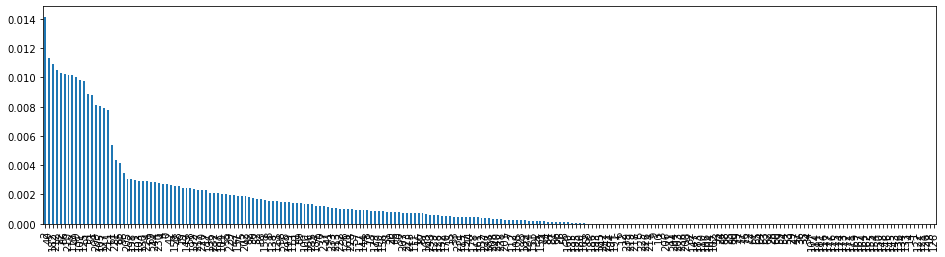

In [82]:
mi.plot.bar(figsize=(16,4))

Individually the features are not showing importance after nearly 60% but within groups they may be important

In [83]:
# selecting top 10 features

sel = SelectPercentile(mutual_info_classif, percentile = 10).fit(X_train_unique, y_train)
X_train_unique.columns[sel.get_support()]

Int64Index([  2,  22,  40,  44,  49,  51,  85,  86,  91,  98, 100, 101, 105,
            119, 125, 127, 136, 182, 187, 209, 210, 211, 212],
           dtype='int64')

In [84]:
len(X_train_unique.columns[sel.get_support()])

# 23 columns selected

23

In [85]:
X_train_mi = sel.transform(X_train_unique)
X_test_mi = sel.transform(X_test_unique)

In [86]:
X_train_mi.shape

(16000, 23)

In [87]:
mi1 = mutual_info_classif(X_train_grouped_uncorr, y_train)

In [88]:
len(mi1)

141

In [89]:
mi1

array([2.70389910e-03, 9.11950022e-04, 1.51794370e-02, 0.00000000e+00,
       1.24340804e-03, 1.32172457e-03, 2.88543201e-04, 0.00000000e+00,
       1.39784150e-03, 7.49946070e-04, 0.00000000e+00, 0.00000000e+00,
       2.88467093e-03, 0.00000000e+00, 3.90360350e-04, 3.83430166e-03,
       8.06744584e-03, 0.00000000e+00, 3.27897635e-03, 5.95719792e-04,
       0.00000000e+00, 0.00000000e+00, 8.09038342e-04, 8.24028219e-03,
       0.00000000e+00, 4.75760904e-03, 2.45760712e-04, 8.41121313e-03,
       2.13317594e-03, 2.21343978e-03, 0.00000000e+00, 0.00000000e+00,
       1.93715124e-03, 0.00000000e+00, 1.78599176e-04, 0.00000000e+00,
       1.42502451e-07, 0.00000000e+00, 1.44734932e-03, 0.00000000e+00,
       1.95870478e-04, 5.68950931e-04, 0.00000000e+00, 0.00000000e+00,
       1.81164963e-04, 5.56320760e-03, 7.12148246e-04, 2.93329684e-03,
       2.91808635e-03, 0.00000000e+00, 7.42629828e-04, 9.75778310e-03,
       0.00000000e+00, 2.14394727e-04, 7.78408399e-03, 0.00000000e+00,
      

In [90]:
mi1 = pd.Series(mi1)
mi1.index = X_train_grouped_uncorr.columns

In [91]:
mi1.sort_values(ascending = False, inplace = True)

<AxesSubplot:>

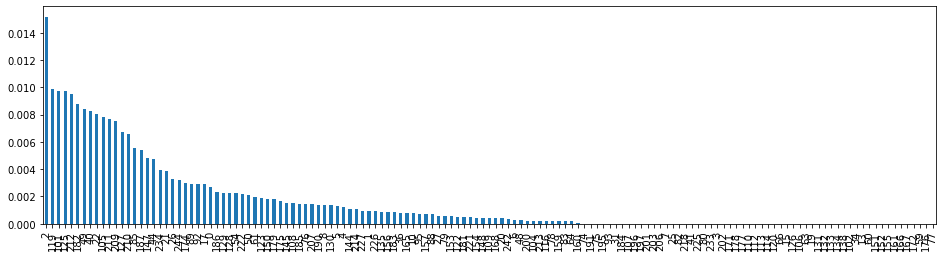

In [92]:
mi1.plot.bar(figsize=(16,4))

In [93]:
# selecting top 10 features

sel1 = SelectPercentile(mutual_info_classif, percentile = 10).fit(X_train_grouped_uncorr, y_train)
X_train_grouped_uncorr.columns[sel1.get_support()]

Int64Index([2, 21, 22, 40, 49, 101, 105, 119, 125, 127, 182, 209, 210, 212], dtype='int64')

In [94]:
len(X_train_grouped_uncorr.columns[sel1.get_support()])

# 14 columns selected

14

In [95]:
X_train_mi1 = sel1.transform(X_train_grouped_uncorr)
X_test_mi1 = sel1.transform(X_test_grouped_uncorr)

In [96]:
X_train_mi1.shape, X_test_mi1.shape

((16000, 14), (4000, 14))

#### Build the model and compare the performance

In [97]:
%%time
run_randomForest(X_train_mi,X_test_mi,y_train, y_test)

Accuracy of the dataset:  0.95825
Wall time: 832 ms


In [98]:
%%time
run_randomForest(X_train_mi1,X_test_mi1,y_train, y_test)

Accuracy of the dataset:  0.95875
Wall time: 938 ms


### Mutual Information Gain in Regression Problem

In [99]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [100]:
boston = load_boston()

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

In [101]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [102]:
X1 = pd.DataFrame(data=boston.data, columns=boston.feature_names)
X1.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [103]:
y1 = boston.target

In [104]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.2, random_state=0)
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((404, 13), (102, 13), (404,), (102,))

In [105]:
mi = mutual_info_regression(X1_train, y1_train)
mi = pd.Series(mi)

mi.index = X1_train.columns
mi.sort_values(ascending=False, inplace=True)

In [106]:
mi

LSTAT      0.677794
RM         0.562568
INDUS      0.527167
PTRATIO    0.495519
NOX        0.450846
TAX        0.393416
CRIM       0.365949
AGE        0.343555
DIS        0.323104
RAD        0.221077
ZN         0.198153
B          0.148007
CHAS       0.008358
dtype: float64

<AxesSubplot:>

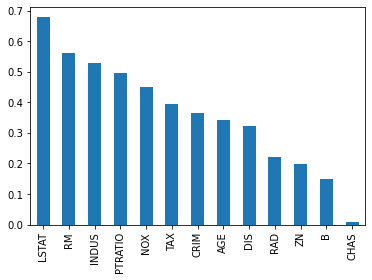

In [107]:
mi.plot.bar()

In [108]:
sel = SelectKBest(mutual_info_regression, k=9).fit(X1_train, y1_train)
X1_train.columns[sel.get_support()]

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

In [109]:
X1_train

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
220   0.35809   0.0   6.20   1.0  0.507  6.951  88.5  2.8617   8.0  307.0   
71    0.15876   0.0  10.81   0.0  0.413  5.961  17.5  5.2873   4.0  305.0   
240   0.11329  30.0   4.93   0.0  0.428  6.897  54.3  6.3361   6.0  300.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012  66.6  5.5605   5.0  311.0   
417  25.94060   0.0  18.10   0.0  0.679  5.304  89.1  1.6475  24.0  666.0   
..        ...   ...    ...   ...    ...    ...   ...     ...   ...    ...   
323   0.28392   0.0   7.38   0.0  0.493  5.708  74.3  4.7211   5.0  287.0   
192   0.08664  45.0   3.44   0.0  0.437  7.178  26.3  6.4798   5.0  398.0   
117   0.15098   0.0  10.01   0.0  0.547  6.021  82.6  2.7474   6.0  432.0   
47    0.22927   0.0   6.91   0.0  0.448  6.030  85.5  5.6894   3.0  233.0   
172   0.13914   0.0   4.05   0.0  0.510  5.572  88.5  2.5961   5.0  296.0   

     PTRATIO       B  LSTAT  
220     17.4  391.70   9.71  
71      19.2  376.94   9.88  
240     16.6  391.25  11.38  
6       15.2  395.60  12.43  
417     20.2  127.36  26.64  
..       ...     ...    ...  
323     19.6  391.13  11.74  
192     15.2  390.49   2.87  
117     17.8  394.51  10.30  
47      17.9  392.74  18.80  
172     16.6  396.90  14.69  

[404 rows x 13 columns]

In [110]:
# model on all the features
model = LinearRegression()
model.fit(X1_train,y1_train)
y1_pred = model.predict(X1_test)

In [111]:
r2_score(y1_test, y1_pred)

0.5892223849182507

In [112]:
print("RMSE is : ",np.sqrt(mean_squared_error(y1_test,y1_pred)))

RMSE is :  5.783509315085135


In [113]:
# std dev of entire y column 
np.std(y)

0.19747804308327652

In [114]:
# now for the selected features

X_train_9 = sel.transform(X1_train)
print(X_train_9.shape)
X_test_9 = sel.transform(X1_test)
print(X_test_9.shape)

(404, 9)
(102, 9)


In [115]:
model = LinearRegression()
model.fit(X_train_9, y1_train)
y1_pred = model.predict(X_test_9)

In [116]:
r2_score(y1_test, y1_pred)

0.531712760696157

In [117]:
print("RMSE is : ",np.sqrt(mean_squared_error(y1_test,y1_pred)))

RMSE is :  6.175103151293751


___
___

## Feature Selection Based on Univariate ROC_AUC for Classification

#### ROC Curve

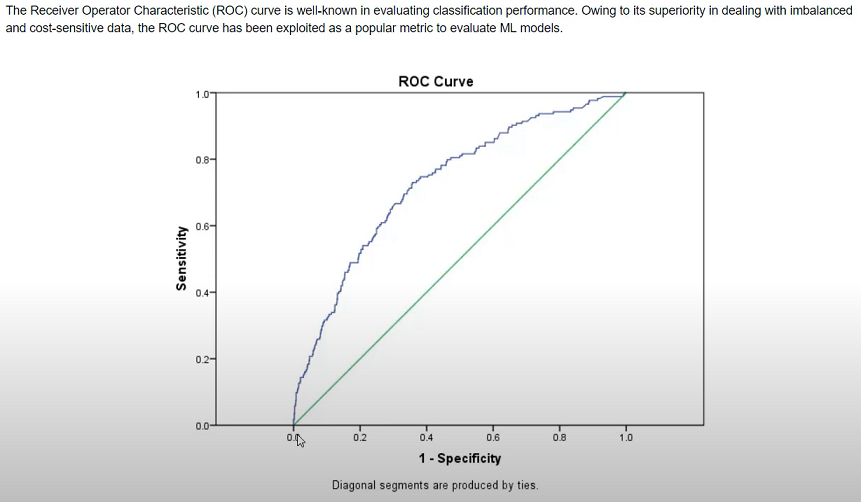

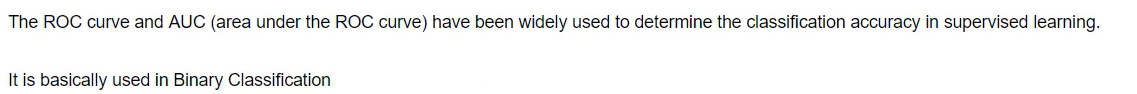

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

#### after performing feature selection with constant, quasi constant and correlation

In [120]:
X_train_grouped_uncorr.shape, X_test_grouped_uncorr.shape

((16000, 141), (4000, 141))

In [121]:
X_train_unique.shape, X_test_unique.shape

((16000, 227), (4000, 227))

#### Now calculate ROC_AUC Score

In [122]:
X_train_unique

0    1     2    3    4    5    6    7    8    9    ...  235  236  \
0      17282.0  2.0  24.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1      38270.0  2.0  23.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2      31526.0  2.0  45.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3      38737.0  2.0  29.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4      16469.0  2.0  23.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...        ...  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
15995  38333.0  2.0  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
15996  26389.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
15997   2025.0  2.0  43.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
15998  17327.0  2.0  23.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
15999  25406.0  2.0  23.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

       237  238  239  240  241  242  243            244  
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0   63200.700000  
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0   88640.610000  
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0   96314.160000  
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  117568.020000  
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  117310.979016  
...    ...  ...  ...  ...  ...  ...  ...            ...  
15995  0.0  0.0  0.0  0.0  0.0  0.0  0.0   53324.460000  
15996  0.0  0.0  0.0  0.0  0.0  0.0  0.0   56028.480000  
15997  0.0  0.0  0.0  0.0  0.0  0.0  0.0   38272.440000  
15998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  117310.979016  
15999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  304163.070000  

[16000 rows x 227 columns]

In [123]:
y_train.shape

(16000,)

#### will take tooooooooooooooooooo much time

In [124]:
roc_auc = []

for feature in X_train_unique.columns:
    clf = RandomForestClassifier(n_estimators=100, random_state=0,n_jobs=-1)
    clf.fit(X_train_unique[feature].to_frame(), y_train) # to_frame converts to 1-D array
    y_pred = clf.predict(X_test_unique[feature].to_frame())
    roc_auc.append(roc_auc_score(y_test, y_pred))


In [125]:
print(roc_auc)

[0.5020561820568537, 0.5, 0.5, 0.49986968986187125, 0.501373452866903, 0.49569976544175137, 0.5028068643863192, 0.49986968986187125, 0.5, 0.5, 0.4997393797237425, 0.5017643832812891, 0.49569976544175137, 0.49960906958561374, 0.49895751889497003, 0.49700286682303885, 0.49960906958561374, 0.5021553136956755, 0.4968725566849101, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49986968986187125, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5029371745244479, 0.4959603857180089, 0.5, 0.5048318679438659, 0.4997393797237425, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49921813917122754, 0.49921813917122754, 0.49824600955181303, 0.5, 0.5, 0.5, 0.4990878290330988, 0.4983763196899418, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

In [126]:
roc_values = pd.Series(roc_auc)
roc_values.index = X_train_unique.columns
roc_values.sort_values(ascending=False, inplace=True)

In [127]:
roc_values

# roc values equal or less than 0.5 are just making random predictions

244    0.507660
107    0.504832
104    0.502937
6      0.502807
155    0.502546
         ...   
18     0.496873
211    0.496742
105    0.495960
12     0.495700
5      0.495700
Length: 227, dtype: float64

<AxesSubplot:>

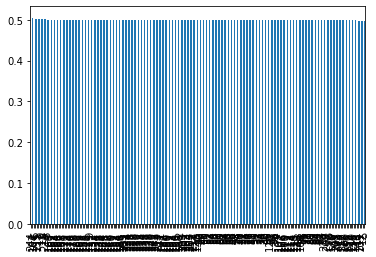

In [128]:
roc_values.plot.bar()

In [129]:
# removing equal to and less than 0.5
sel = roc_values[roc_values > 0.5]
sel

244    0.507660
107    0.504832
104    0.502937
6      0.502807
155    0.502546
215    0.502286
17     0.502155
0      0.502056
11     0.501764
4      0.501373
216    0.501243
dtype: float64

In [130]:
sel.shape

# 11 columns

(11,)

In [131]:
X_train_roc = X_train_unique[sel.index]
X_test_roc = X_test_unique[sel.index]

#### Build the Model and compare the performance

In [132]:
%%time
run_randomForest(X_train_roc,X_test_roc,y_train,y_test)

Accuracy of the dataset:  0.95275
Wall time: 1.36 s


In [133]:
X_train_roc.shape

(16000, 11)

In [134]:
%%time
run_randomForest(X_train,X_test,y_train,y_test)

Accuracy of the dataset:  0.9585
Wall time: 2.32 s


In [135]:
roc_auc1 = []

for feature in X_train_grouped_uncorr.columns:
    clf = RandomForestClassifier(n_estimators=100, random_state=0,n_jobs=-1)
    clf.fit(X_train_grouped_uncorr[feature].to_frame(), y_train)
    y_pred = clf.predict(X_test_grouped_uncorr[feature].to_frame())
    roc_auc1.append(roc_auc_score(y_test, y_pred))


In [136]:
roc_values = pd.Series(roc_auc1)
roc_values.index = X_train_grouped_uncorr.columns
roc_values.sort_values(ascending=False, inplace=True)

In [137]:
roc_values

244    0.507660
107    0.504832
104    0.502937
6      0.502807
155    0.502546
         ...   
119    0.498246
15     0.497003
211    0.496742
105    0.495960
5      0.495700
Length: 141, dtype: float64

<AxesSubplot:>

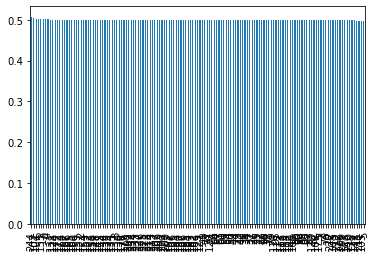

In [138]:
roc_values.plot.bar()

In [139]:
# removing equal to and less than 0.5
sel = roc_values[roc_values > 0.5]
sel

244    0.507660
107    0.504832
104    0.502937
6      0.502807
155    0.502546
17     0.502155
0      0.502056
4      0.501373
dtype: float64

In [140]:
sel.shape

# 8 columns

(8,)

In [141]:
X_train_roc = X_train_grouped_uncorr[sel.index]
X_test_roc = X_test_grouped_uncorr[sel.index]

In [142]:
%%time
run_randomForest(X_train_roc,X_test_roc,y_train,y_test)

Accuracy of the dataset:  0.9535
Wall time: 1.27 s


In [143]:
X_train_roc.shape

(16000, 8)

___
___

# Feature Selection Based on Univariate MSE for Regression

In [144]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [145]:
boston = load_boston()

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

In [146]:
X1 = pd.DataFrame(data=boston.data, columns=boston.feature_names)
X1.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [147]:
y1 = boston.target

In [148]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.2, random_state=0)
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((404, 13), (102, 13), (404,), (102,))

In [149]:
mse = []

for feature in X1_train.columns:
    clf = LinearRegression()
    clf.fit(X1_train[feature].to_frame(), y1_train)
    y_pred1 = clf.predict(X1_test[feature].to_frame())
    mse.append(mean_squared_error(y1_test, y_pred1))

In [150]:
mse

[76.38674157646072,
 84.66034377707905,
 77.02905244667242,
 79.36120219345942,
 76.95375968209433,
 46.907351627395315,
 80.3915476111525,
 82.61874125667718,
 82.46499985731933,
 78.30831374720843,
 81.79497121208001,
 77.75285601192718,
 46.33630536002592]

In [151]:
mse = pd.Series(mse, index=X1_train.columns)
mse.sort_values(ascending=False, inplace=True)
mse

ZN         84.660344
DIS        82.618741
RAD        82.465000
PTRATIO    81.794971
AGE        80.391548
CHAS       79.361202
TAX        78.308314
B          77.752856
INDUS      77.029052
NOX        76.953760
CRIM       76.386742
RM         46.907352
LSTAT      46.336305
dtype: float64

<AxesSubplot:>

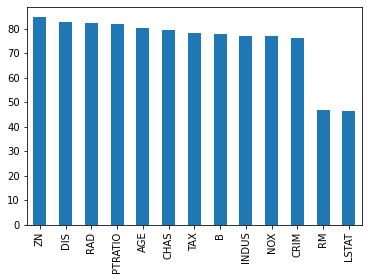

In [152]:
mse.plot.bar()

#### lower the MSE value that is better, So we will first do with the last 2 columns

In [153]:
X_train_2 = X1_train[['RM','LSTAT']]
X_test_2 = X1_test[['RM','LSTAT']]

In [154]:
%%time
model = LinearRegression()
model.fit(X_train_2, y1_train)
y_pred1 = model.predict(X_test_2)
print('R2 score: ', r2_score(y1_test, y_pred1))
print('RMSE : ', np.sqrt(mean_squared_error(y1_test, y_pred1)))
print('Sd of house price dataset: ', np.std(y1))

R2 score:  0.5409084827186417
RMSE :  6.114172522817782
Sd of house price dataset:  9.188011545278203
Wall time: 28.6 ms


In [155]:
%%time
model = LinearRegression()
model.fit(X1_train, y1_train)
y_pred1 = model.predict(X1_test)
print('R2 score: ', r2_score(y1_test, y_pred1))
print('RMSE : ', np.sqrt(mean_squared_error(y1_test, y_pred1)))
print('Sd of house price dataset: ', np.std(y1))

R2 score:  0.5892223849182507
RMSE :  5.783509315085135
Sd of house price dataset:  9.188011545278203
Wall time: 30.8 ms


___
___

# Feature Selection Based on Univariate (ANNOVA) test for classification

The elimination process aim to reduce the size of the input feature and at the same time to retain the class discriminatory information for classification problems.
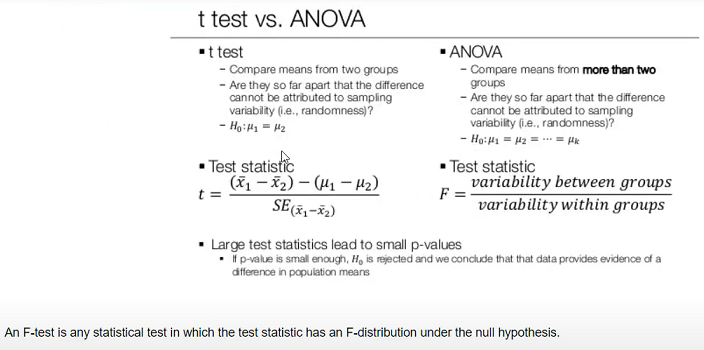

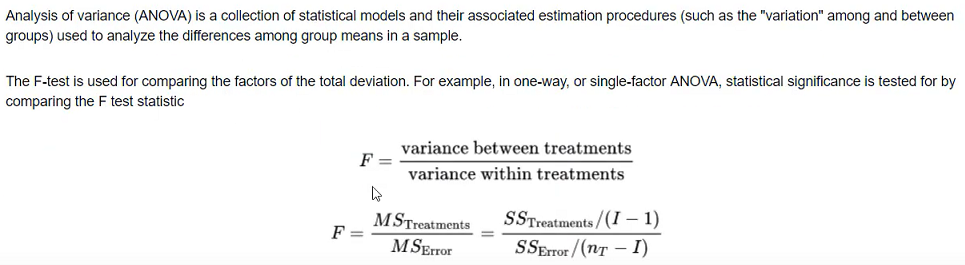

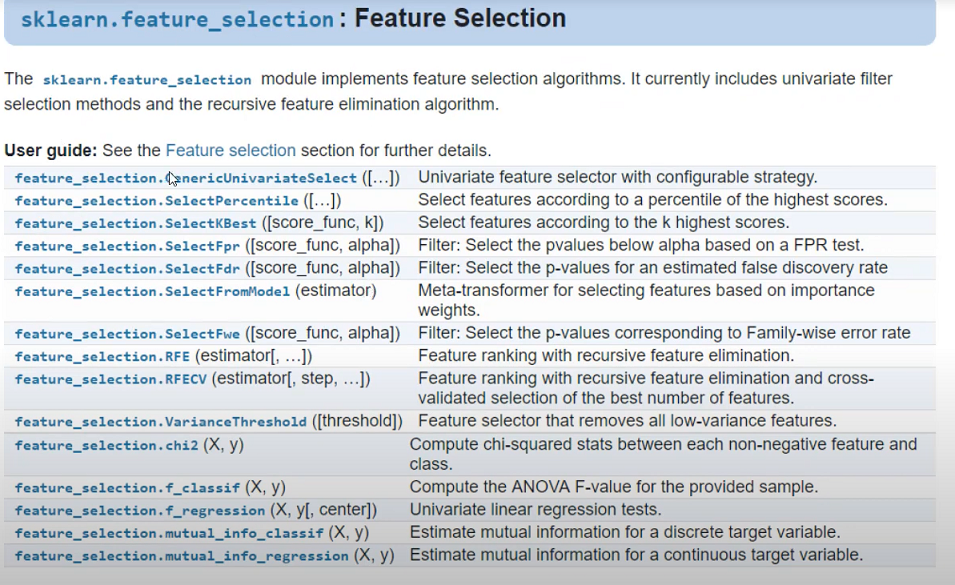

### Classification Problem

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

#### Remove constants, Quasi constants and correlation

In [157]:
X_train_unique.shape, X_test_unique.shape, y_train.shape, y_test.shape

((16000, 227), (4000, 227), (16000,), (4000,))

### Now do F-test using ANNOVA

In [158]:
sel = f_classif(X_train_unique, y_train)

In [159]:
sel

(array([3.42911520e-01, 1.22929093e+00, 1.61291330e+02, 4.01025132e-01,
        8.37661151e-01, 2.39279390e-03, 4.41633351e-02, 1.36337510e-01,
        1.84647123e+00, 2.03640367e+00, 7.98057954e-03, 1.14063993e+00,
        6.32266614e-03, 1.55626237e+01, 1.53553790e+01, 1.28615978e+01,
        1.61834746e+01, 1.59638013e+01, 1.21977511e+01, 9.03776687e-02,
        1.00443179e+00, 1.53946148e+01, 2.50428951e+02, 2.98696944e+01,
        1.06266841e+01, 2.63630437e+01, 1.66417611e+01, 3.13699473e+01,
        2.47256550e+01, 2.60021376e+01, 3.26742018e+01, 9.94259060e+00,
        1.48208220e+01, 1.50040146e+01, 1.34739830e+01, 7.03118653e+00,
        1.36234772e+01, 7.95962134e+00, 3.15161070e+02, 1.79631284e+00,
        1.66910747e+00, 1.21138302e+01, 1.10928892e+01, 1.00443179e+00,
        2.31851572e+00, 8.93973153e+01, 7.53868668e+00, 2.38490562e+02,
        2.98696944e+01, 1.06266841e+01, 2.61694409e+01, 1.66053267e+01,
        2.93013259e+01, 2.44433356e+01, 2.60021376e+01, 5.596238

#### classif has 0th place as f-score value and 1st place p_values

In [160]:
p_values = pd.Series(sel[1])
p_values.index = X_train_unique.columns
p_values.sort_values(ascending = True, inplace = True)

<AxesSubplot:>

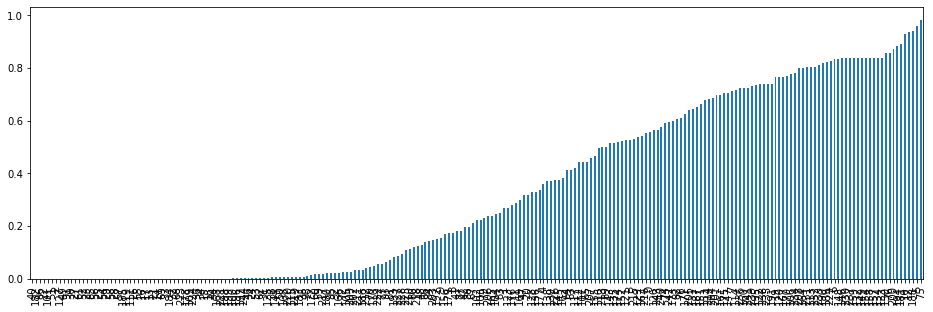

In [161]:
p_values.plot.bar(figsize = (16, 5))

In [162]:
p_values = p_values[p_values<0.05]
p_values

40     7.665738e-70
182    1.494938e-68
86     4.187175e-61
22     5.565785e-56
101    3.557912e-55
           ...     
211    3.232153e-02
186    3.342479e-02
212    4.162651e-02
70     4.286237e-02
110    4.639047e-02
Length: 88, dtype: float64

In [163]:
p_values[p_values<0.05].shape

# 88 columns have p-values less than 0.05 which are significant

(88,)

In [164]:
X_train_p = X_train_unique[p_values.index]
X_test_p = X_test_unique[p_values.index]

#### Build the classifier model and test

In [165]:
%%time
run_randomForest(X_train_p,X_test_p,y_train,y_test)

Accuracy of the dataset:  0.953
Wall time: 1.22 s


In [166]:
%%time
run_randomForest(X_train,X_test,y_train,y_test)

Accuracy of the dataset:  0.9585
Wall time: 2.27 s


____
___

# Feature Selection using Fisher Score and Chi2 $(\chi^2)$ test

## Used only on categorical data

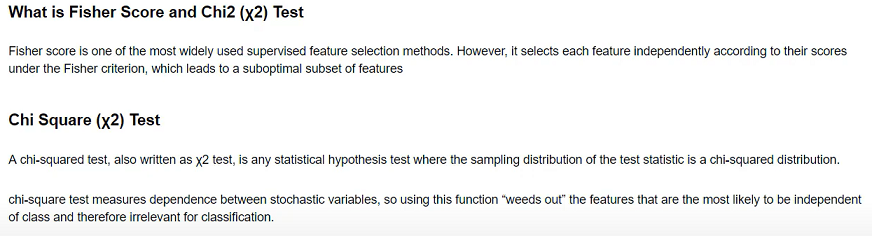

Compute chi-squared stats between each non-negative feature and class.

- This score should be used to evaluate categorical variables in a classification task.

This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.
The Chi Square statistic is commonly used for testing relationships between categorical variables.

It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories.

In [167]:
from sklearn.feature_selection import chi2

In [168]:
titanic =sns.load_dataset('titanic')

In [169]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [170]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [171]:
## ['sex','embarked','alone','pclass','Survived']
titanic.drop(labels =['age','deck'],axis = 1, inplace=True)

In [172]:
titanic = titanic.dropna()

In [173]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [174]:
data = titanic[['sex','embarked','alone','pclass','sibsp','parch','who']].copy()

In [175]:
data.head()

sex embarked  alone  pclass  sibsp  parch    who
0    male        S  False       3      1      0    man
1  female        C  False       1      1      0  woman
2  female        S   True       3      0      0  woman
3  female        S  False       1      1      0  woman
4    male        S   True       3      0      0    man

In [176]:
data.isnull().sum()

sex         0
embarked    0
alone       0
pclass      0
sibsp       0
parch       0
who         0
dtype: int64

In [177]:
data.shape

(889, 7)

In [178]:
ordinal_label = {k: i for i, k in enumerate(data['embarked'].unique(), 0)}
data['embarked'] = data['embarked'].map(ordinal_label)

In [179]:
data

sex  embarked  alone  pclass  sibsp  parch    who
0      male         0  False       3      1      0    man
1    female         1  False       1      1      0  woman
2    female         0   True       3      0      0  woman
3    female         0  False       1      1      0  woman
4      male         0   True       3      0      0    man
..      ...       ...    ...     ...    ...    ...    ...
886    male         0   True       2      0      0    man
887  female         0   True       1      0      0  woman
888  female         0  False       3      1      2  woman
889    male         1   True       1      0      0    man
890    male         2   True       3      0      0    man

[889 rows x 7 columns]

In [180]:
sex = {'male': 0, 'female':1}
data['sex'] = data['sex'].map(sex)

In [181]:
data

sex  embarked  alone  pclass  sibsp  parch    who
0      0         0  False       3      1      0    man
1      1         1  False       1      1      0  woman
2      1         0   True       3      0      0  woman
3      1         0  False       1      1      0  woman
4      0         0   True       3      0      0    man
..   ...       ...    ...     ...    ...    ...    ...
886    0         0   True       2      0      0    man
887    1         0   True       1      0      0  woman
888    1         0  False       3      1      2  woman
889    0         1   True       1      0      0    man
890    0         2   True       3      0      0    man

[889 rows x 7 columns]

In [182]:
ordinal_label = {k: i for i, k in enumerate(data['who'].unique(), 0)}
data['who'] = data['who'].map(ordinal_label)

In [183]:
data

sex  embarked  alone  pclass  sibsp  parch  who
0      0         0  False       3      1      0    0
1      1         1  False       1      1      0    1
2      1         0   True       3      0      0    1
3      1         0  False       1      1      0    1
4      0         0   True       3      0      0    0
..   ...       ...    ...     ...    ...    ...  ...
886    0         0   True       2      0      0    0
887    1         0   True       1      0      0    1
888    1         0  False       3      1      2    1
889    0         1   True       1      0      0    0
890    0         2   True       3      0      0    0

[889 rows x 7 columns]

In [184]:
data['alone']=np.where(data['alone']==True,1,0)

In [185]:
data

sex  embarked  alone  pclass  sibsp  parch  who
0      0         0      0       3      1      0    0
1      1         1      0       1      1      0    1
2      1         0      1       3      0      0    1
3      1         0      0       1      1      0    1
4      0         0      1       3      0      0    0
..   ...       ...    ...     ...    ...    ...  ...
886    0         0      1       2      0      0    0
887    1         0      1       1      0      0    1
888    1         0      0       3      1      2    1
889    0         1      1       1      0      0    0
890    0         2      1       3      0      0    0

[889 rows x 7 columns]

In [186]:
X11 = data.copy()
y11 = titanic['survived']

In [187]:
X11_train, X11_test, y11_train, y11_test  = train_test_split(X11,y11,test_size=0.2,random_state=0)

In [188]:
X11_train.shape, X11_test.shape, y11_train.shape, y11_test.shape

((711, 7), (178, 7), (711,), (178,))

In [189]:
f_score = chi2(X11_train, y11_train)

In [190]:
f_score

(array([152.91534343,  16.13255653,  13.4382363 ,  22.65169202,
          0.52934285,  10.35663782, 161.42431175]),
 array([3.99737147e-35, 5.90599986e-05, 2.46547298e-04, 1.94189138e-06,
        4.66883271e-01, 1.29009955e-03, 5.52664700e-37]))

In [191]:
p_values = pd.Series(f_score[1], index=X11_train.columns)
p_values.sort_values(ascending=True, inplace=True)

In [192]:
p_values

who         5.526647e-37
sex         3.997371e-35
pclass      1.941891e-06
embarked    5.906000e-05
alone       2.465473e-04
parch       1.290100e-03
sibsp       4.668833e-01
dtype: float64

<AxesSubplot:>

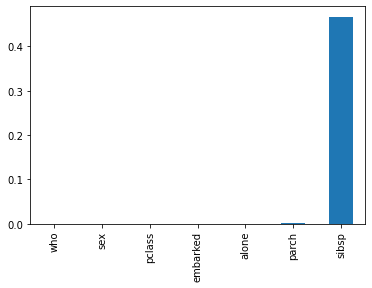

In [193]:
p_values.plot.bar()

In [194]:
# selecting top 2 based on p-values
X_train_2 = X11_train[['who','sex']]
X_test_2= X11_test[['who','sex']]

In [195]:
%%time
run_randomForest(X_train_2,X_test_2,y11_train,y11_test)

Accuracy of the dataset:  0.7191011235955056
Wall time: 1.01 s


In [196]:
# selecting top 3 based on p-values
X_train_3 = X11_train[['who','sex','pclass']]
X_test_3 = X11_test[['who','sex','pclass']]

In [197]:
%%time
run_randomForest(X_train_3,X_test_3,y11_train,y11_test)

Accuracy of the dataset:  0.7415730337078652
Wall time: 607 ms


In [198]:
# selecting top 4 based on p-values
X_train_4 = X11_train[['who','sex','pclass','embarked']]
X_test_4 = X11_test[['who','sex','pclass','embarked']]

In [199]:
%%time
run_randomForest(X_train_4,X_test_4,y11_train,y11_test)

Accuracy of the dataset:  0.7584269662921348
Wall time: 778 ms


In [200]:
# selecting top 5 based on p-values
X_train_5 = X11_train[['who','sex','pclass','embarked','alone']]
X_test_5 = X11_test[['who','sex','pclass','embarked','alone']]

In [201]:
%%time
run_randomForest(X_train_5,X_test_5,y11_train,y11_test)

Accuracy of the dataset:  0.7528089887640449
Wall time: 633 ms


___
___
___